In [1]:
library(IRdisplay)
library(phsstyles)
library(ggplot2)
library(survival)

In [2]:
#devtools::document('../eavehelpers')
devtools::load_all('../eavehelpers')

ℹ Loading eavehelpers

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


Loading required package: timechange


Attaching package: ‘lubridate’


The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse


This is mgcv 1.8-40. For overview type 'help("mgcv-package")'.

tidymv will be deprecated. Users are recommended
    to check out the in-progress replacement tidygam
    (https://github.com/stefanocoretta/tidygam).




In [5]:
modelA.ORs <- readRDS("results/2DOSE/modelA_gamFit_OR.rds")
#fix these labels
modelA.ORs <- modelA.ORs %>% mutate(level = case_when(
                                                var=='n_risk_gps' & level=='3' ~ '3-4',
                                                var=='n_risk_gps' & level=='4' ~ '5+',
                                                TRUE ~ level),
                                    level = gsub("AZ","ChAdOx1",level),
                                    level = gsub("Pfizer","BNT162b2 ",level),
                                    level = gsub("Moderna","mRNA-1273",level))

In [4]:
eavehelpers::display_ratios_table(modelA.ORs) %>%
  as.character() %>%
  display_html()

var,label,level,uORs,ORs
cat,Vaccine Dose,<b>Two doses of BNT162b2 /mRNA-1273 (ref)</b>,-,-
cat,,Two doses of ChAdOx1,12.38 (10.06 - 15.24),9.90 (7.87 - 12.45)
cat,,Mixed 3+ doses (including ChAdOx1),0.60 (0.40 - 0.89),0.68 (0.41 - 1.12)
cat,,Mixed 3+ doses (no ChAdOx1),0.34 (0.20 - 0.60),0.42 (0.23 - 0.77)
ch_resident,Care Home Resident,<b>No (ref)</b>,-,-
ch_resident,,Yes,1.81 (1.07 - 3.06),1.02 (0.55 - 1.89)
immuno,Immunosuppressed,<b>No (ref)</b>,-,-
immuno,,Yes,1.22 (0.99 - 1.50),1.05 (0.83 - 1.33)
immuno,,Severely,2.66 (2.23 - 3.17),2.25 (1.80 - 2.83)
n_risk_gps,Number of Risks,<b>0 (ref)</b>,-,-


Warning message in geom_pointrange(aes(y = Nominal, ymin = LCL, ymax = UCL, fill = !!sym(fill_var), :
“Ignoring unknown parameters: `width`”


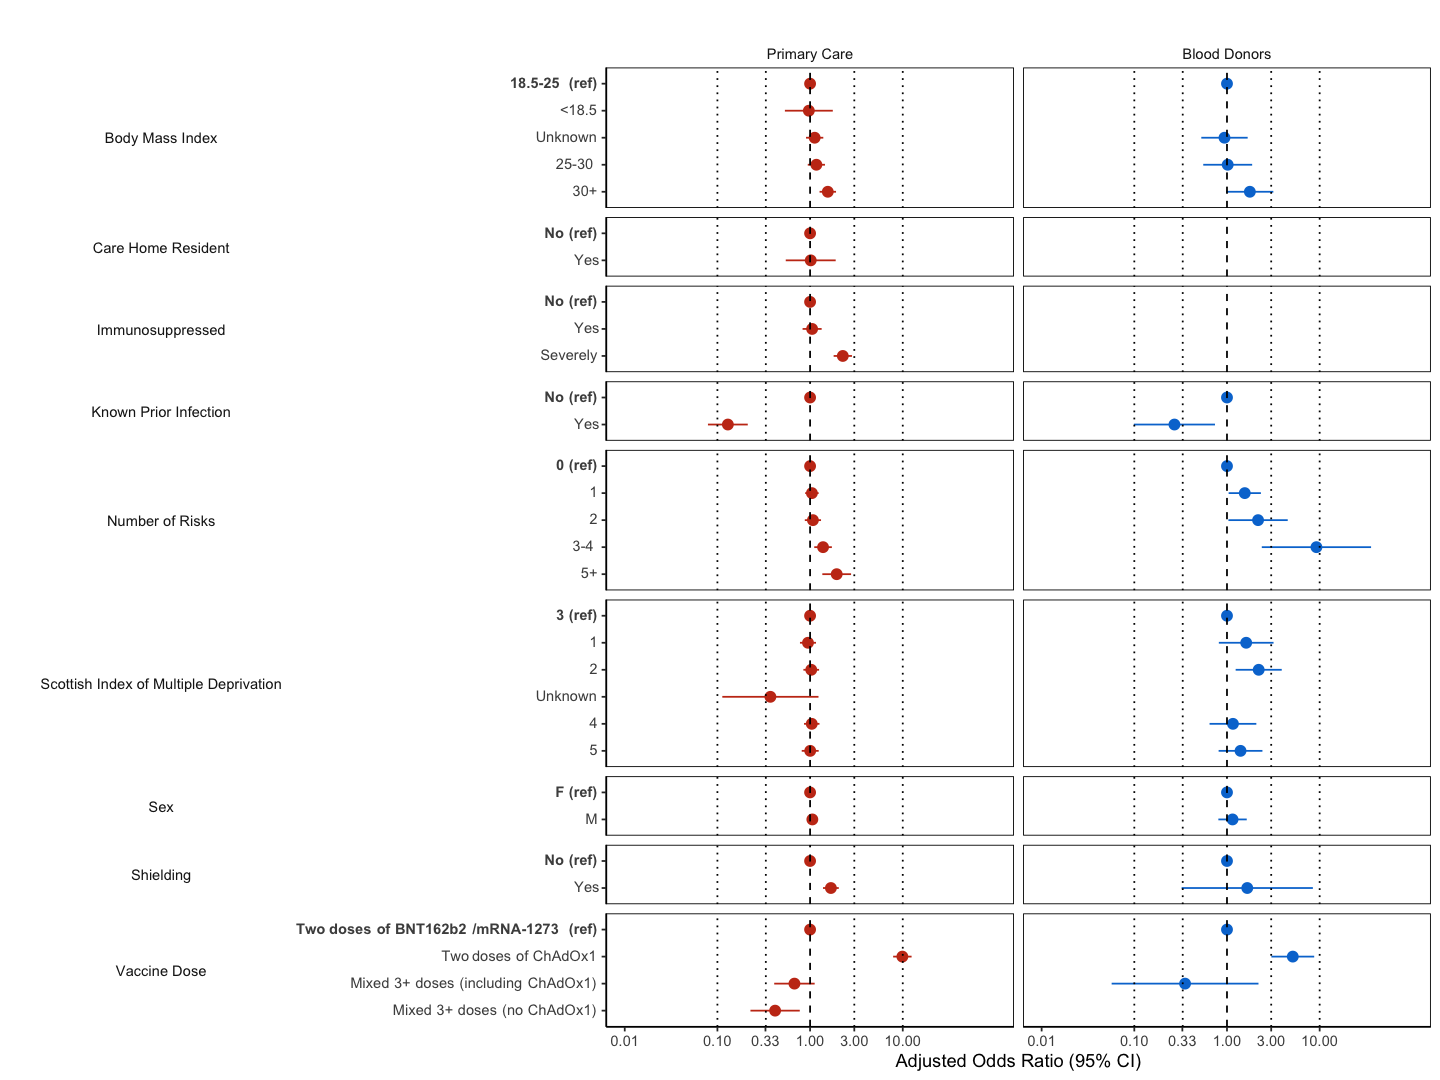

In [5]:
options(repr.plot.width=12, repr.plot.height=9)
p.modelA.ORs <- eavehelpers::plot_ratios(modelA.ORs,
                                               fill=cohort,
                                               xtitle='Adjusted Odds Ratio (95% CI)',
                                               facet=as.factor(label) ~ fct_rev(as.factor(cohort))
                                               ) 
p.modelA.ORs

In [6]:
ggsave("modelA_ORs.pdf", p.modelA.ORs , width=12, height=9, dpi=300, units="in")

Warning message in geom_pointrange(aes(y = Nominal, ymin = LCL, ymax = UCL, fill = !!sym(fill_var), :
“Ignoring unknown parameters: `width`”


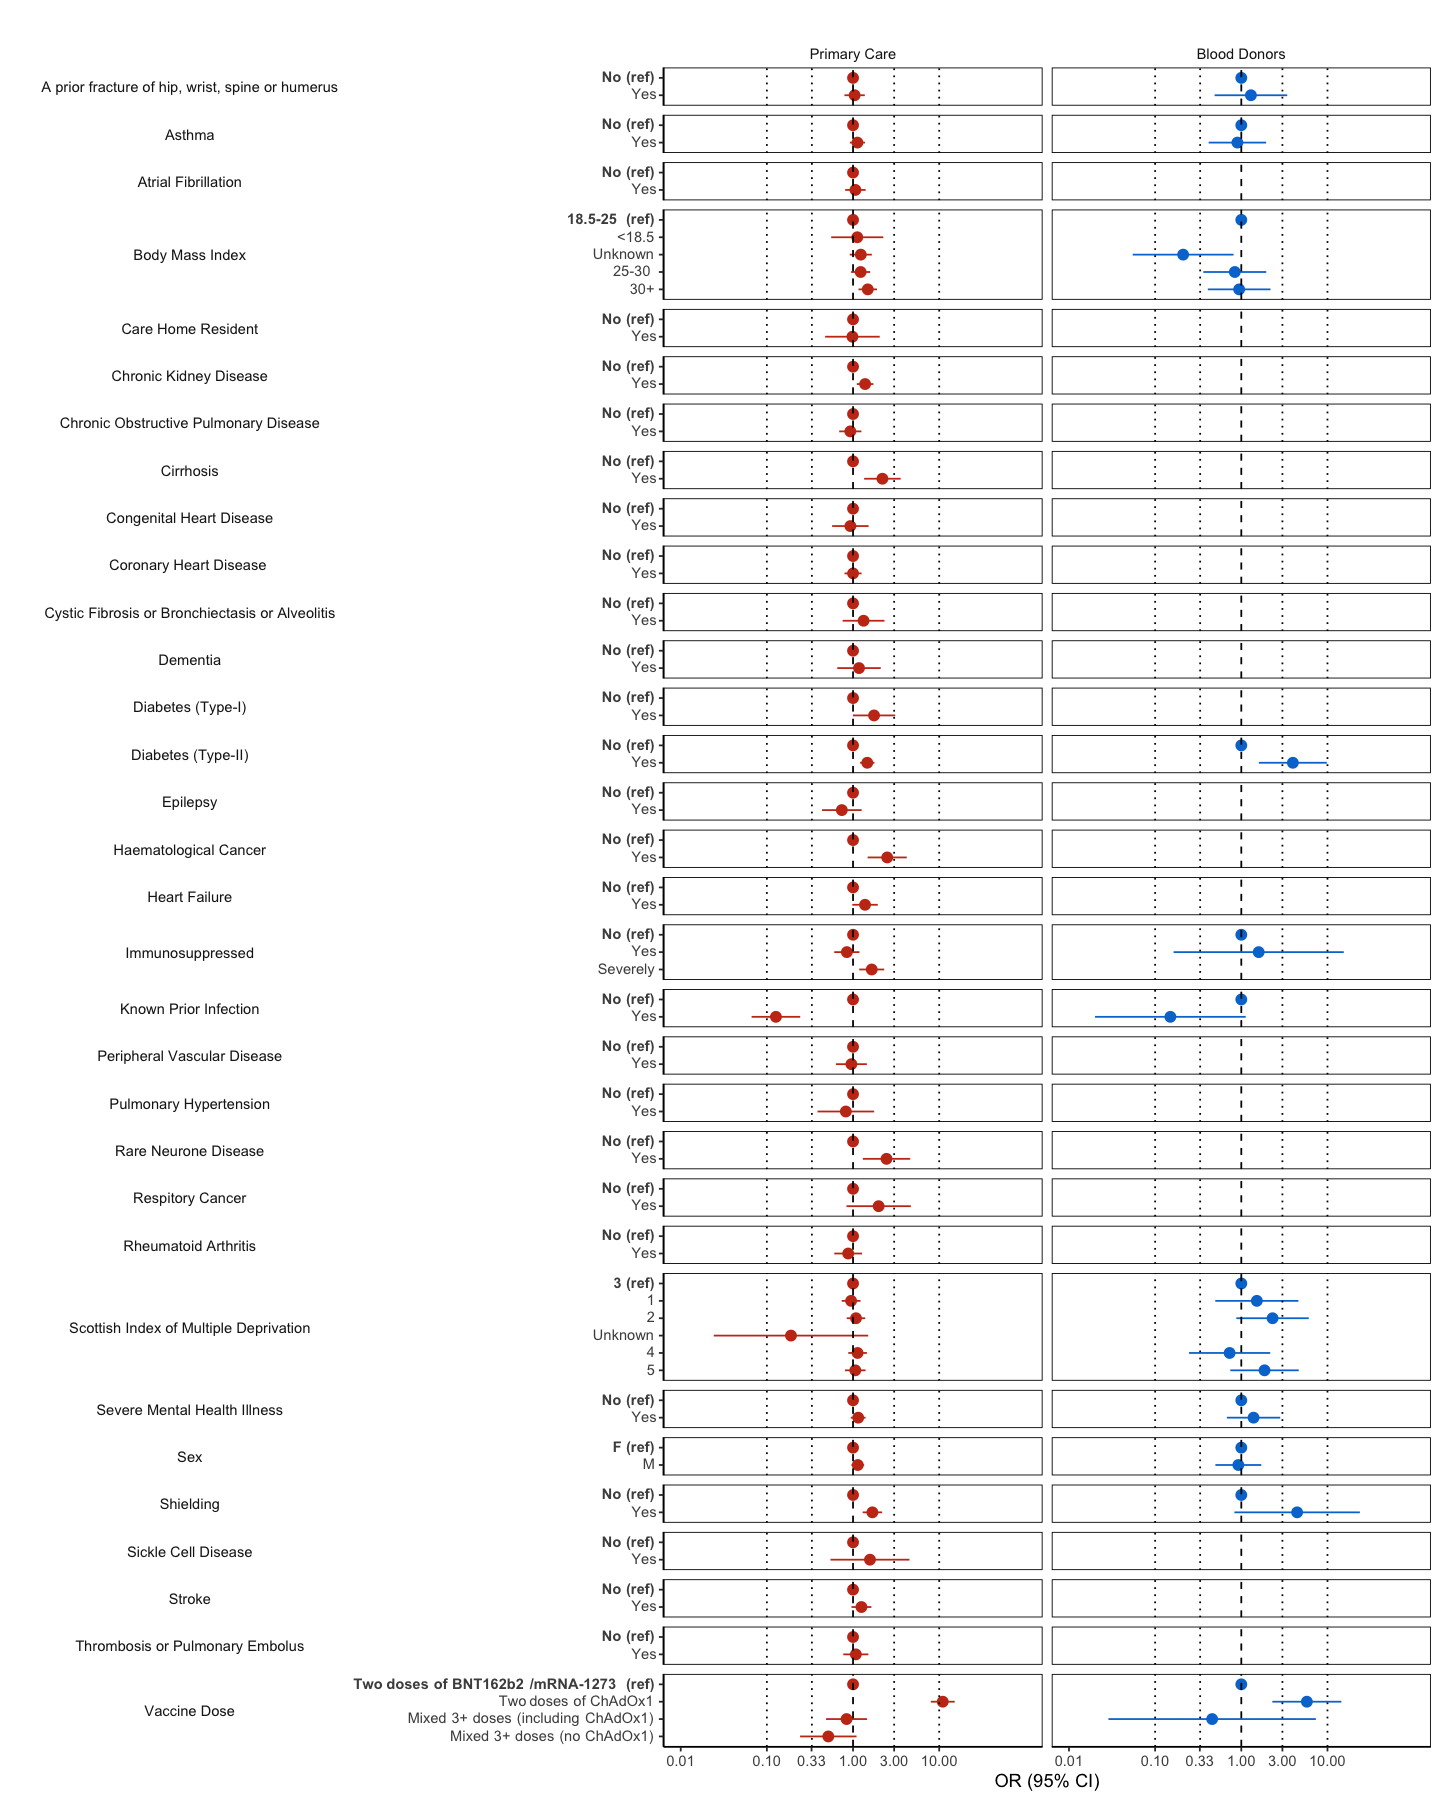

In [7]:
modelB.ORs <- readRDS("results/2DOSE/modelB_gamFit_OR.rds") %>%
              mutate(
                    label = gsub("Blood","Haematological",label),
                    level = gsub("AZ","ChAdOx1",level),
                    level = gsub("Pfizer","BNT162b2 ",level),
                    level = gsub("Moderna","mRNA-1273",level))

options(repr.plot.width=12, repr.plot.height=15)
p.modelB.ORs <- eavehelpers::plot_ratios(modelB.ORs,
                                               fill=cohort,
                                               facet=as.factor(label) ~ fct_rev(as.factor(cohort))
                                               ) 
ggsave("modelB_ORs_v2.pdf", p.modelB.ORs , width=12, height=15, dpi=300, units="in")
p.modelB.ORs

In [8]:
modelB.ORs2 <- modelB.ORs %>% mutate(level=ifelse(grepl("Q_DIAG",names) & level=='Yes',label,level),
                      label=ifelse(grepl("Q_DIAG",names),'Risk Group',label))
modelB.ORs2[modelB.ORs2$label=='Risk Group' & modelB.ORs2$pos==2,]  <- modelB.ORs2[modelB.ORs2$label=='Risk Group' & modelB.ORs2$pos==2,] %>% mutate(pos=row_number()+1)
modelB.ORs2

names,Nominal,pv,se,LCL,UCL,var,level,label,uOR,uLCL,uUCL,pos,cohort
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
catTwo doses of Pfizer/Moderna,1.0000000,NA,NA,1.00000000,1.0000000,cat,<b>Two doses of BNT162b2 /mRNA-1273 (ref)</b>,Vaccine Dose,NA,NA,NA,1,Primary Care
catTwo doses of AZ,10.9913402,4.950348e-49,0.1628706,7.98721870,15.1253601,cat,Two doses of ChAdOx1,Vaccine Dose,11.88075781,8.85037026,15.9487572,2,Primary Care
catMixed 3+ doses (including AZ),0.8412132,5.363099e-01,0.2796077,0.48626193,1.4552642,cat,Mixed 3+ doses (including ChAdOx1),Vaccine Dose,0.63690097,0.39183252,1.0352455,3,Primary Care
catMixed 3+ doses (no AZ),0.5164187,8.598411e-02,0.3848852,0.24285180,1.0981523,cat,Mixed 3+ doses (no ChAdOx1),Vaccine Dose,0.39431627,0.19295760,0.8058004,4,Primary Care
ch_residentNo,1.0000000,NA,NA,1.00000000,1.0000000,ch_resident,<b>No (ref)</b>,Care Home Resident,NA,NA,NA,1,Primary Care
ch_residentYes,0.9837773,9.649359e-01,0.3720545,0.47441584,2.0400200,ch_resident,Yes,Care Home Resident,1.26092337,0.68787629,2.3113571,2,Primary Care
immunoNo,1.0000000,NA,NA,1.00000000,1.0000000,immuno,<b>No (ref)</b>,Immunosuppressed,NA,NA,NA,1,Primary Care
immunoYes,0.8476465,3.361999e-01,0.1718742,0.60519414,1.1872299,immuno,Yes,Immunosuppressed,0.86551774,0.65428178,1.1449516,2,Primary Care
immunoSeverely,1.6475553,3.417787e-03,0.1705568,1.17934683,2.3016457,immuno,Severely,Immunosuppressed,2.18952934,1.75073457,2.7383013,3,Primary Care


In [9]:
modelB.ORs2 %>% filter(grepl("Q_DIAG",var)) %>% arrange(level)

names,Nominal,pv,se,LCL,UCL,var,level,label,uOR,uLCL,uUCL,pos,cohort
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Q_DIAG_AFNo,1.0000000,NA,NA,1.0000000,1.000000,Q_DIAG_AF,<b>No (ref)</b>,Risk Group,NA,NA,NA,1,Primary Care
Q_DIAG_ASTHMANo,1.0000000,NA,NA,1.0000000,1.000000,Q_DIAG_ASTHMA,<b>No (ref)</b>,Risk Group,NA,NA,NA,1,Primary Care
Q_DIAG_BLOOD_CANCERNo,1.0000000,NA,NA,1.0000000,1.000000,Q_DIAG_BLOOD_CANCER,<b>No (ref)</b>,Risk Group,NA,NA,NA,1,Primary Care
Q_DIAG_CCFNo,1.0000000,NA,NA,1.0000000,1.000000,Q_DIAG_CCF,<b>No (ref)</b>,Risk Group,NA,NA,NA,1,Primary Care
Q_DIAG_CHDNo,1.0000000,NA,NA,1.0000000,1.000000,Q_DIAG_CHD,<b>No (ref)</b>,Risk Group,NA,NA,NA,1,Primary Care
Q_DIAG_CIRRHOSISNo,1.0000000,NA,NA,1.0000000,1.000000,Q_DIAG_CIRRHOSIS,<b>No (ref)</b>,Risk Group,NA,NA,NA,1,Primary Care
Q_DIAG_CKDNo,1.0000000,NA,NA,1.0000000,1.000000,Q_DIAG_CKD,<b>No (ref)</b>,Risk Group,NA,NA,NA,1,Primary Care
Q_DIAG_CONGEN_HDNo,1.0000000,NA,NA,1.0000000,1.000000,Q_DIAG_CONGEN_HD,<b>No (ref)</b>,Risk Group,NA,NA,NA,1,Primary Care
Q_DIAG_COPDNo,1.0000000,NA,NA,1.0000000,1.000000,Q_DIAG_COPD,<b>No (ref)</b>,Risk Group,NA,NA,NA,1,Primary Care


Warning message in geom_pointrange(aes(y = Nominal, ymin = LCL, ymax = UCL, fill = !!sym(fill_var), :
“Ignoring unknown parameters: `width`”


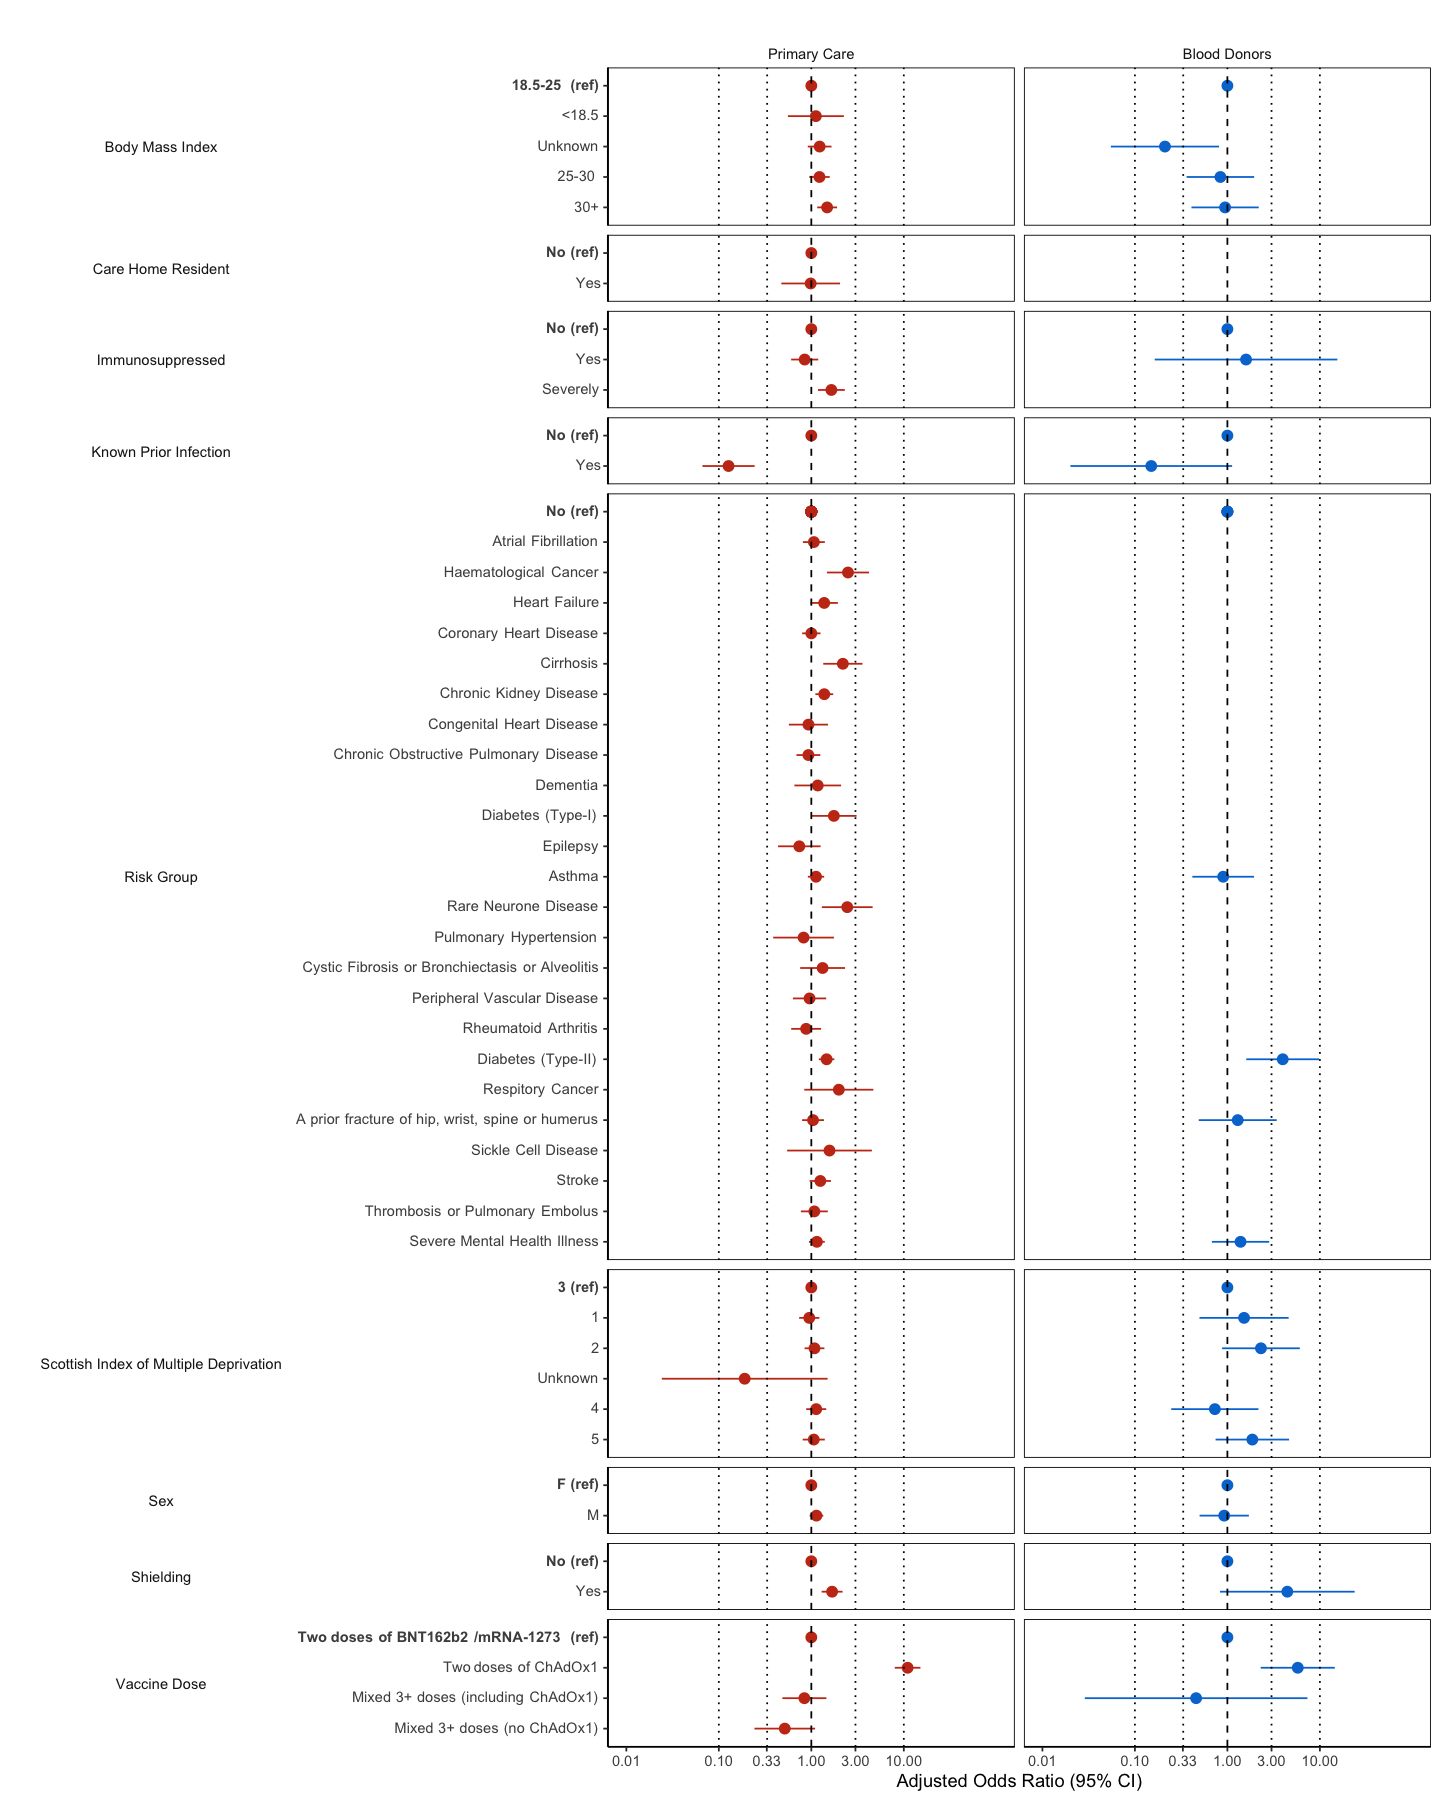

In [10]:
options(repr.plot.width=12, repr.plot.height=15)
p.modelB.ORs <- eavehelpers::plot_ratios(modelB.ORs2 %>% arrange(level),
                                          fill=cohort,
                                          facet=as.factor(label) ~ fct_rev(as.factor(cohort)),
                                          xtitle='Adjusted Odds Ratio (95% CI)',
                                        ) 
ggsave("modelB_ORs.pdf", p.modelB.ORs , width=12, height=15, dpi=300, units="in")
p.modelB.ORs

Warning message in geom_pointrange(aes(y = Nominal, ymin = LCL, ymax = UCL, fill = !!sym(fill_var), :
“Ignoring unknown parameters: `width`”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”


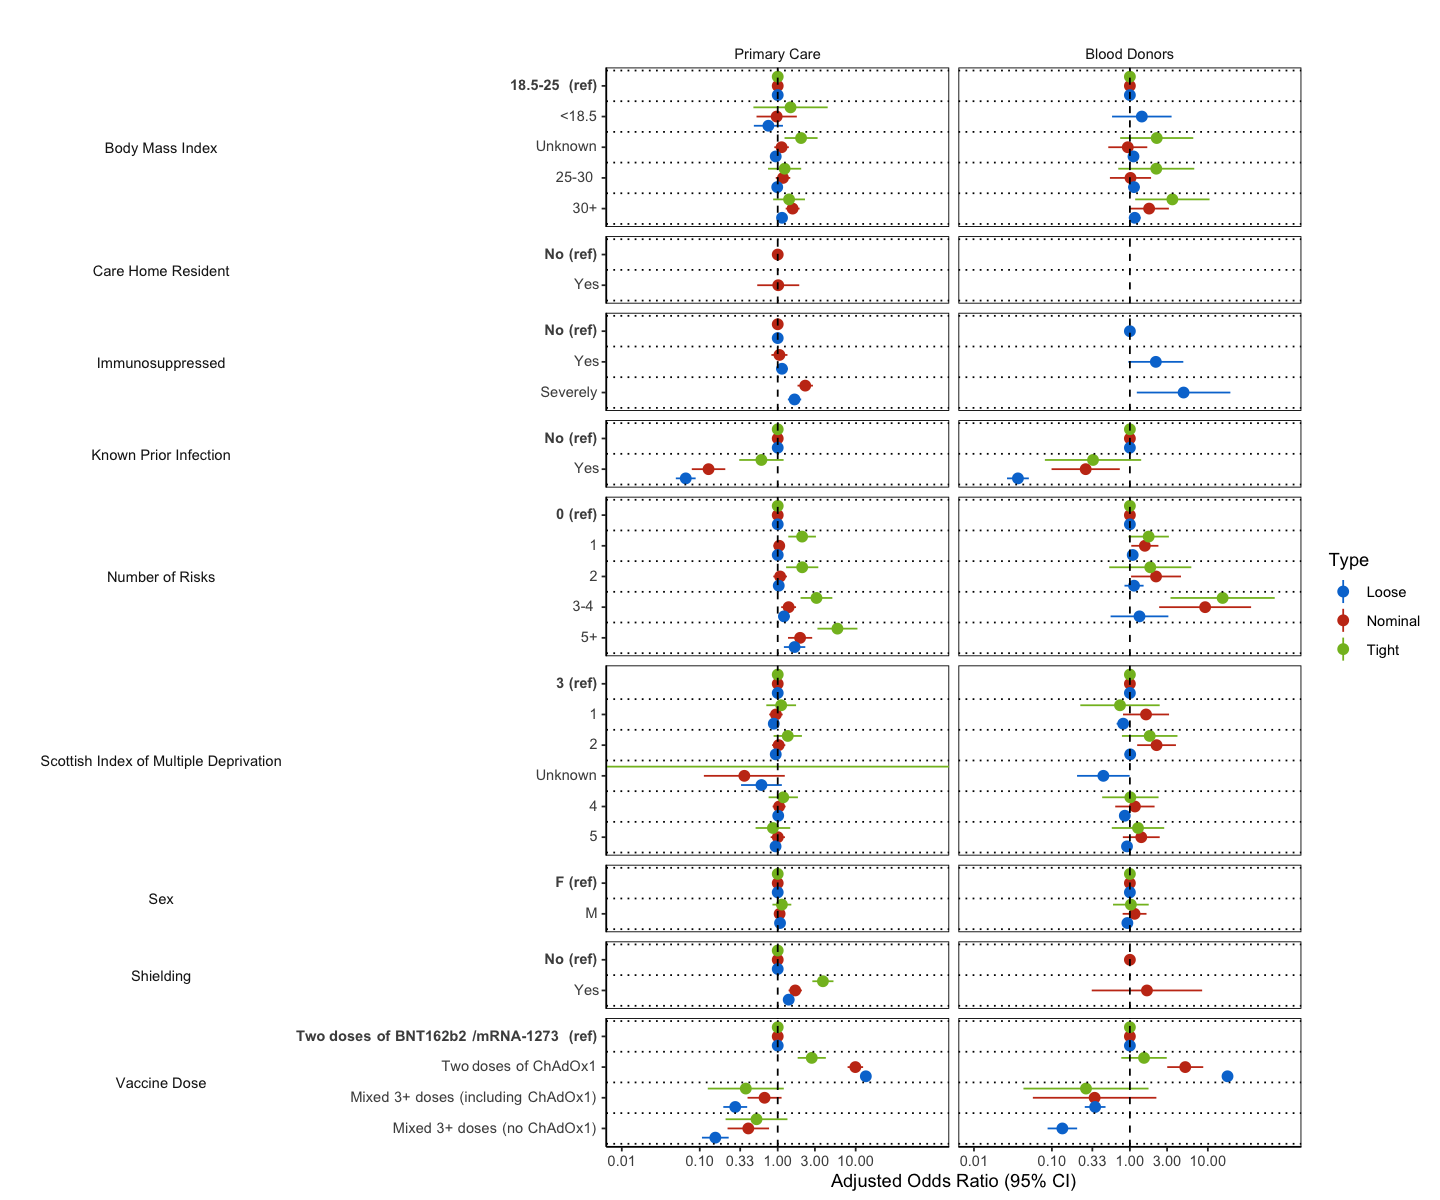

In [8]:
modelA.ORs.L <- readRDS("results/2DOSE_Loose/modelA_gamFit_OR.rds") %>%
              mutate(
                    label = gsub("Blood","Haematological",label),
                    level = gsub("AZ","ChAdOx1",level),
                    level = gsub("Pfizer","BNT162b2 ",level),
                    level = gsub("Moderna","mRNA-1273",level))

modelA.ORs.T <- readRDS("results/2DOSE_Tight/modelA_gamFit_OR.rds") %>%
              mutate(
                    label = gsub("Blood","Haematological",label),
                    level = gsub("AZ","ChAdOx1",level),
                    level = gsub("Pfizer","BNT162b2 ",level),
                    level = gsub("Moderna","mRNA-1273",level))


modelA.ORs.L <- modelA.ORs.L %>% mutate(level=ifelse(grepl("Q_DIAG",names) & level=='Yes',label,level),
                      label=ifelse(grepl("Q_DIAG",names),'Risk Group',label))
modelA.ORs.L[modelA.ORs.L$label=='Risk Group' & modelA.ORs.L$pos==2,]  <- modelA.ORs.L[modelA.ORs.L$label=='Risk Group' & modelA.ORs.L$pos==2,] %>% mutate(pos=row_number()+1)


modelA.ORs.T <- modelA.ORs.T %>% mutate(level=ifelse(grepl("Q_DIAG",names) & level=='Yes',label,level),
                      label=ifelse(grepl("Q_DIAG",names),'Risk Group',label))
modelA.ORs.T[modelA.ORs.T$label=='Risk Group' & modelA.ORs.T$pos==2,]  <- modelA.ORs.T[modelA.ORs.T$label=='Risk Group' & modelA.ORs.T$pos==2,] %>% mutate(pos=row_number()+1)


modelA.ORs.N <- modelA.ORs %>% mutate(type='Nominal')
modelA.ORs.L <- modelA.ORs.L %>% mutate(type='Loose')
modelA.ORs.T <- modelA.ORs.T %>% mutate(type='Tight')

temp <- modelA.ORs.N %>% rbind(modelA.ORs.T) %>% rbind(modelA.ORs.L)



options(repr.plot.width=12, repr.plot.height=10)
p <- eavehelpers::plot_ratios(temp,
                              no_guides=F,
                              do_vlines=F,
                              fill=type,
                              facet=as.factor(label) ~ fct_rev(as.factor(cohort)),
                              xtitle='Adjusted Odds Ratio (95% CI)',
                              ) 
p <- p + labs(color='Type',fill='Type') + 
         geom_vline(xintercept=seq(0.5,max(temp$pos),1),linetype='dotted')
ggsave("modelA_ORs_sensitivity.pdf", p , width=12, height=10, dpi=300, units="in")
p


In [12]:
modelA.ORs.T %>% filter(var=='n_risk_gps')

names,Nominal,pv,se,LCL,UCL,var,level,label,uOR,uLCL,uUCL,pos,cohort,type
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
n_risk_gps0,1.000000,NA,NA,1.0000000,1.000000,n_risk_gps,<b>0 (ref)</b>,Number of Risks,NA,NA,NA,1,Primary Care,Tight
n_risk_gps1,2.054892,5.414705e-04,0.2081959,1.3663446,3.090423,n_risk_gps,1,Number of Risks,2.142945,1.4685304,3.127080,2,Primary Care,Tight
n_risk_gps2,2.060000,2.893059e-03,0.2426102,1.2803920,3.314299,n_risk_gps,2,Number of Risks,2.823012,1.8312570,4.351871,3,Primary Care,Tight
n_risk_gps3-4,3.140444,1.713195e-06,0.2391761,1.9651245,5.018710,n_risk_gps,3-4,Number of Risks,5.843403,3.9157050,8.720106,4,Primary Care,Tight
n_risk_gps5+,5.831962,4.912596e-09,0.3014225,3.2301730,10.529399,n_risk_gps,5+,Number of Risks,13.757227,8.2944660,22.817778,5,Primary Care,Tight
n_risk_gps0,1.000000,NA,NA,1.0000000,1.000000,n_risk_gps,<b>0 (ref)</b>,Number of Risks,NA,NA,NA,1,Blood Donors,Tight
n_risk_gps1,1.740283,6.918827e-02,0.3048929,0.9573646,3.163461,n_risk_gps,1,Number of Risks,1.764779,1.0036114,3.103237,2,Blood Donors,Tight
n_risk_gps2,1.825679,3.303941e-01,0.6184522,0.5432028,6.136023,n_risk_gps,2,Number of Risks,2.056742,0.6321417,6.691833,3,Blood Donors,Tight
n_risk_gps3-4,15.469366,4.861047e-04,0.7851569,3.3197191,72.084795,n_risk_gps,3-4,Number of Risks,13.537101,3.1836819,57.560115,4,Blood Donors,Tight


Warning message in geom_pointrange(aes(y = Nominal, ymin = LCL, ymax = UCL, fill = !!sym(fill_var), :
“Ignoring unknown parameters: `width`”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”


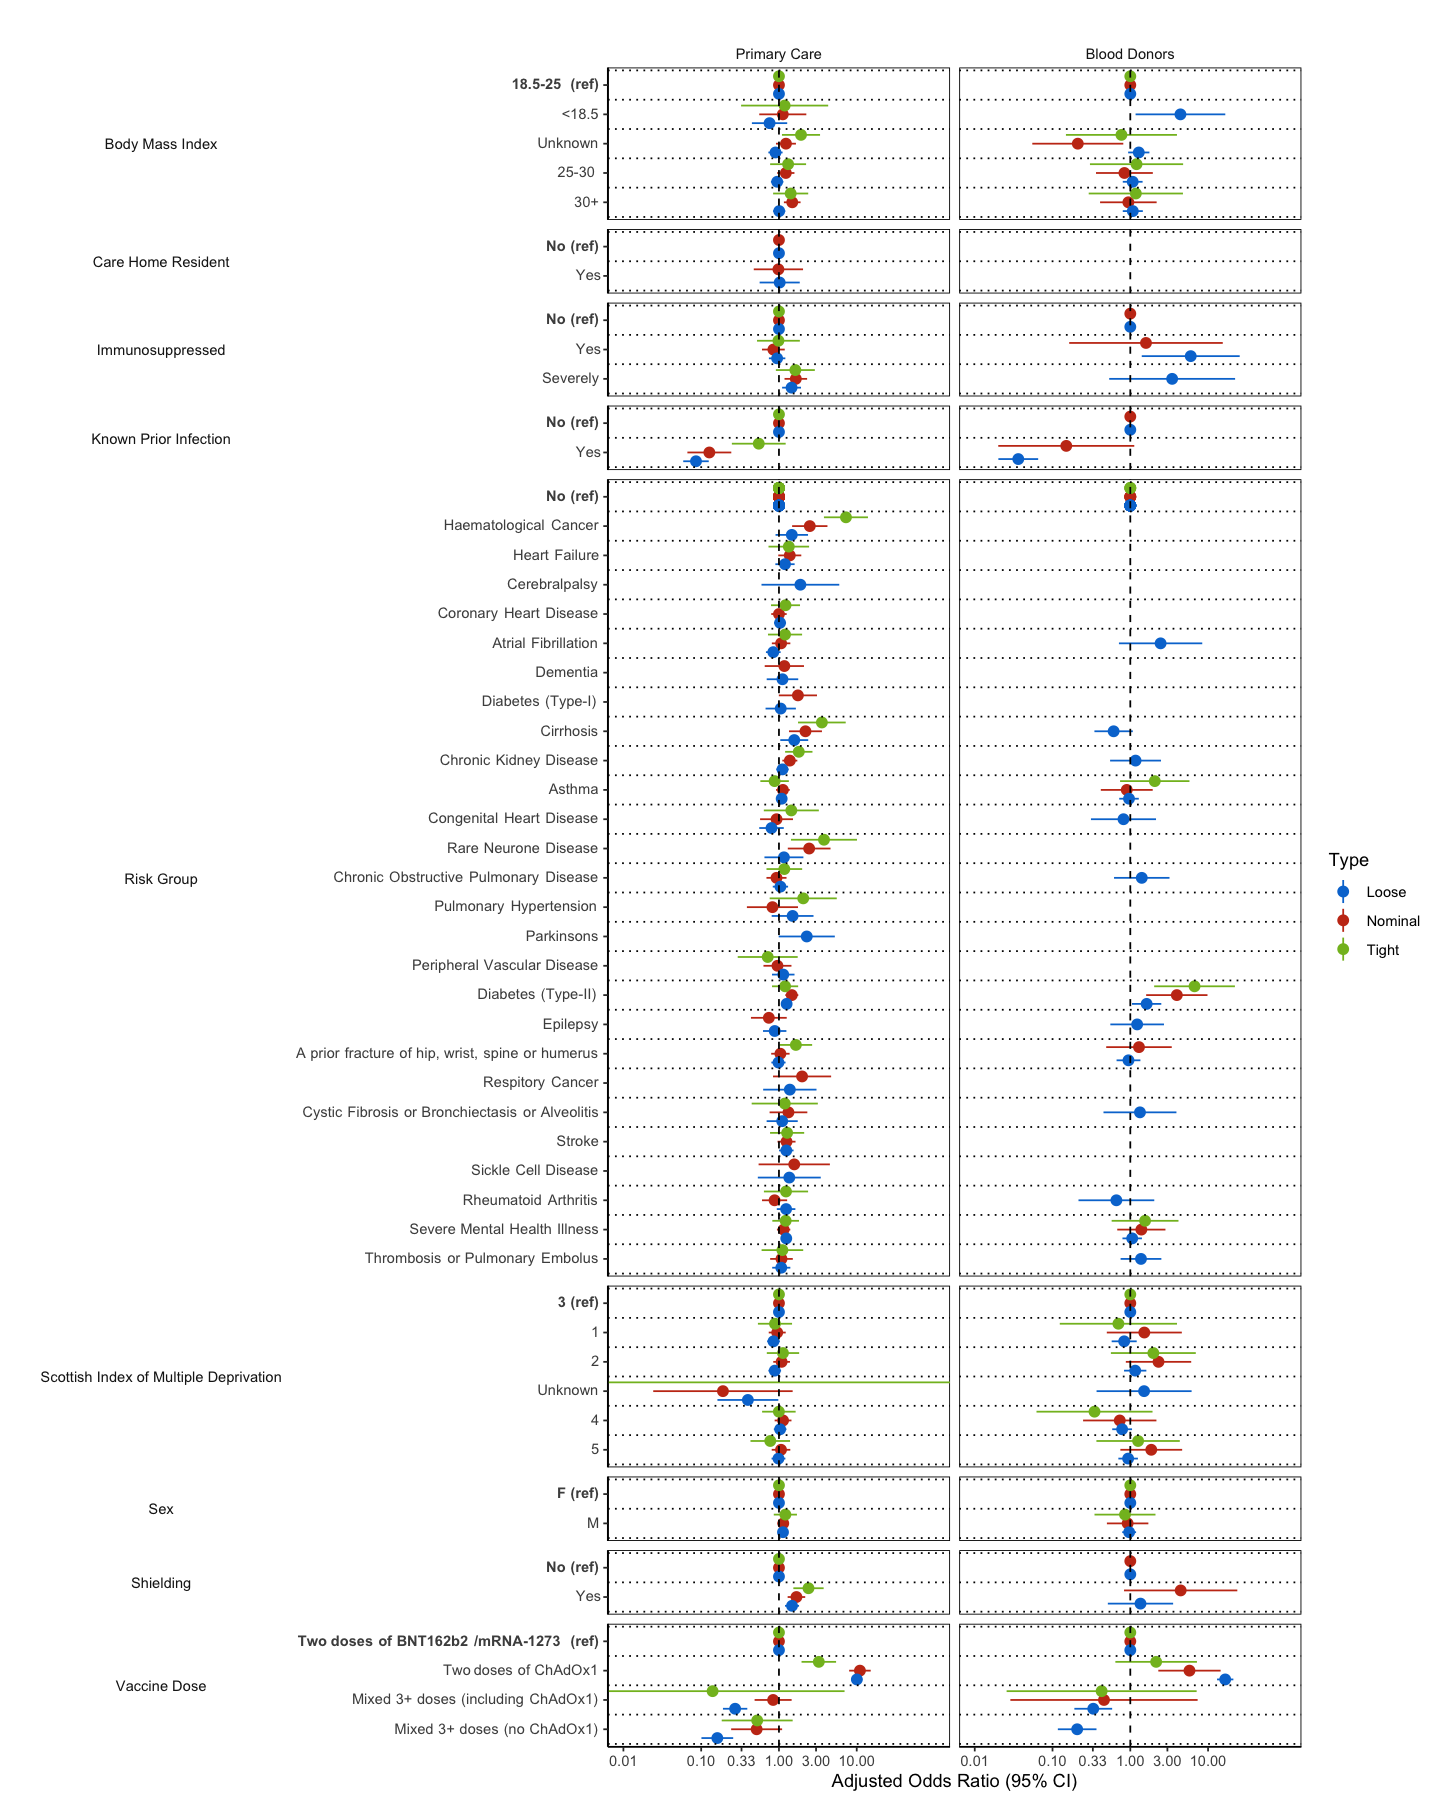

In [11]:
modelB.ORs.L <- readRDS("results/2DOSE_Loose/modelB_gamFit_OR.rds") %>%
              mutate(
                    label = gsub("Blood","Haematological",label),
                    level = gsub("AZ","ChAdOx1",level),
                    level = gsub("Pfizer","BNT162b2 ",level),
                    level = gsub("Moderna","mRNA-1273",level))

modelB.ORs.T <- readRDS("results/2DOSE_Tight/modelB_gamFit_OR.rds") %>%
              mutate(
                    label = gsub("Blood","Haematological",label),
                    level = gsub("AZ","ChAdOx1",level),
                    level = gsub("Pfizer","BNT162b2 ",level),
                    level = gsub("Moderna","mRNA-1273",level))


modelB.ORs.L <- modelB.ORs.L %>% mutate(level=ifelse(grepl("Q_DIAG",names) & level=='Yes',label,level),
                      label=ifelse(grepl("Q_DIAG",names),'Risk Group',label))
modelB.ORs.L[modelB.ORs.L$label=='Risk Group' & modelB.ORs.L$pos==2,]  <- modelB.ORs.L[modelB.ORs.L$label=='Risk Group' & modelB.ORs.L$pos==2,] %>% mutate(pos=row_number()+1)


modelB.ORs.T <- modelB.ORs.T %>% mutate(level=ifelse(grepl("Q_DIAG",names) & level=='Yes',label,level),
                      label=ifelse(grepl("Q_DIAG",names),'Risk Group',label))
modelB.ORs.T[modelB.ORs.T$label=='Risk Group' & modelB.ORs.T$pos==2,]  <- modelB.ORs.T[modelB.ORs.T$label=='Risk Group' & modelB.ORs.T$pos==2,] %>% mutate(pos=row_number()+1)


modelB.ORs.N <- modelB.ORs2 %>% mutate(type='Nominal')
modelB.ORs.L <- modelB.ORs.L %>% mutate(type='Loose')
modelB.ORs.T <- modelB.ORs.T %>% mutate(type='Tight')

temp <- modelB.ORs.N %>% rbind(modelB.ORs.T) %>% rbind(modelB.ORs.L)



options(repr.plot.width=12, repr.plot.height=15)
p <- eavehelpers::plot_ratios(temp,
                              no_guides=F,
                              do_vlines=F,
                              fill=type,
                              facet=as.factor(label) ~ fct_rev(as.factor(cohort)),
                              xtitle='Adjusted Odds Ratio (95% CI)',
                              ) 
p <- p + labs(color='Type',fill='Type') + 
         geom_vline(xintercept=seq(0.5,max(temp$pos),1),linetype='dotted')
ggsave("modelB_ORs_sensitivity.pdf", p , width=12, height=15, dpi=300, units="in")
p


In [12]:
eavehelpers::display_ratios_table(modelB.ORs.T) %>%
  as.character() %>%
  display_html()

var,label,level,uORs,ORs
cat,Vaccine Dose,<b>Two doses of BNT162b2 /mRNA-1273 (ref)</b>,-,-
cat,,Two doses of ChAdOx1,4.47 (2.76 - 7.26),3.25 (1.95 - 5.43)
cat,,Mixed 3+ doses (including ChAdOx1),0.66 (0.31 - 1.42),0.14 (0.00 - 6.97)
cat,,Mixed 3+ doses (no ChAdOx1),0.57 (0.21 - 1.53),0.53 (0.18 - 1.50)
immuno,Immunosuppressed,<b>No (ref)</b>,-,-
immuno,,Yes,1.23 (0.70 - 2.15),0.98 (0.52 - 1.86)
immuno,,Severely,4.04 (2.75 - 5.94),1.62 (0.91 - 2.89)
prior_infection,Known Prior Infection,<b>No (ref)</b>,-,-
prior_infection,,Yes,0.39 (0.18 - 0.84),0.55 (0.25 - 1.22)
Q_BMI,Body Mass Index,<b>18.5-25 (ref)</b>,-,-


Warning message in geom_pointrange(aes(y = Nominal, ymin = LCL, ymax = UCL, fill = !!sym(fill_var), :
“Ignoring unknown parameters: `width`”


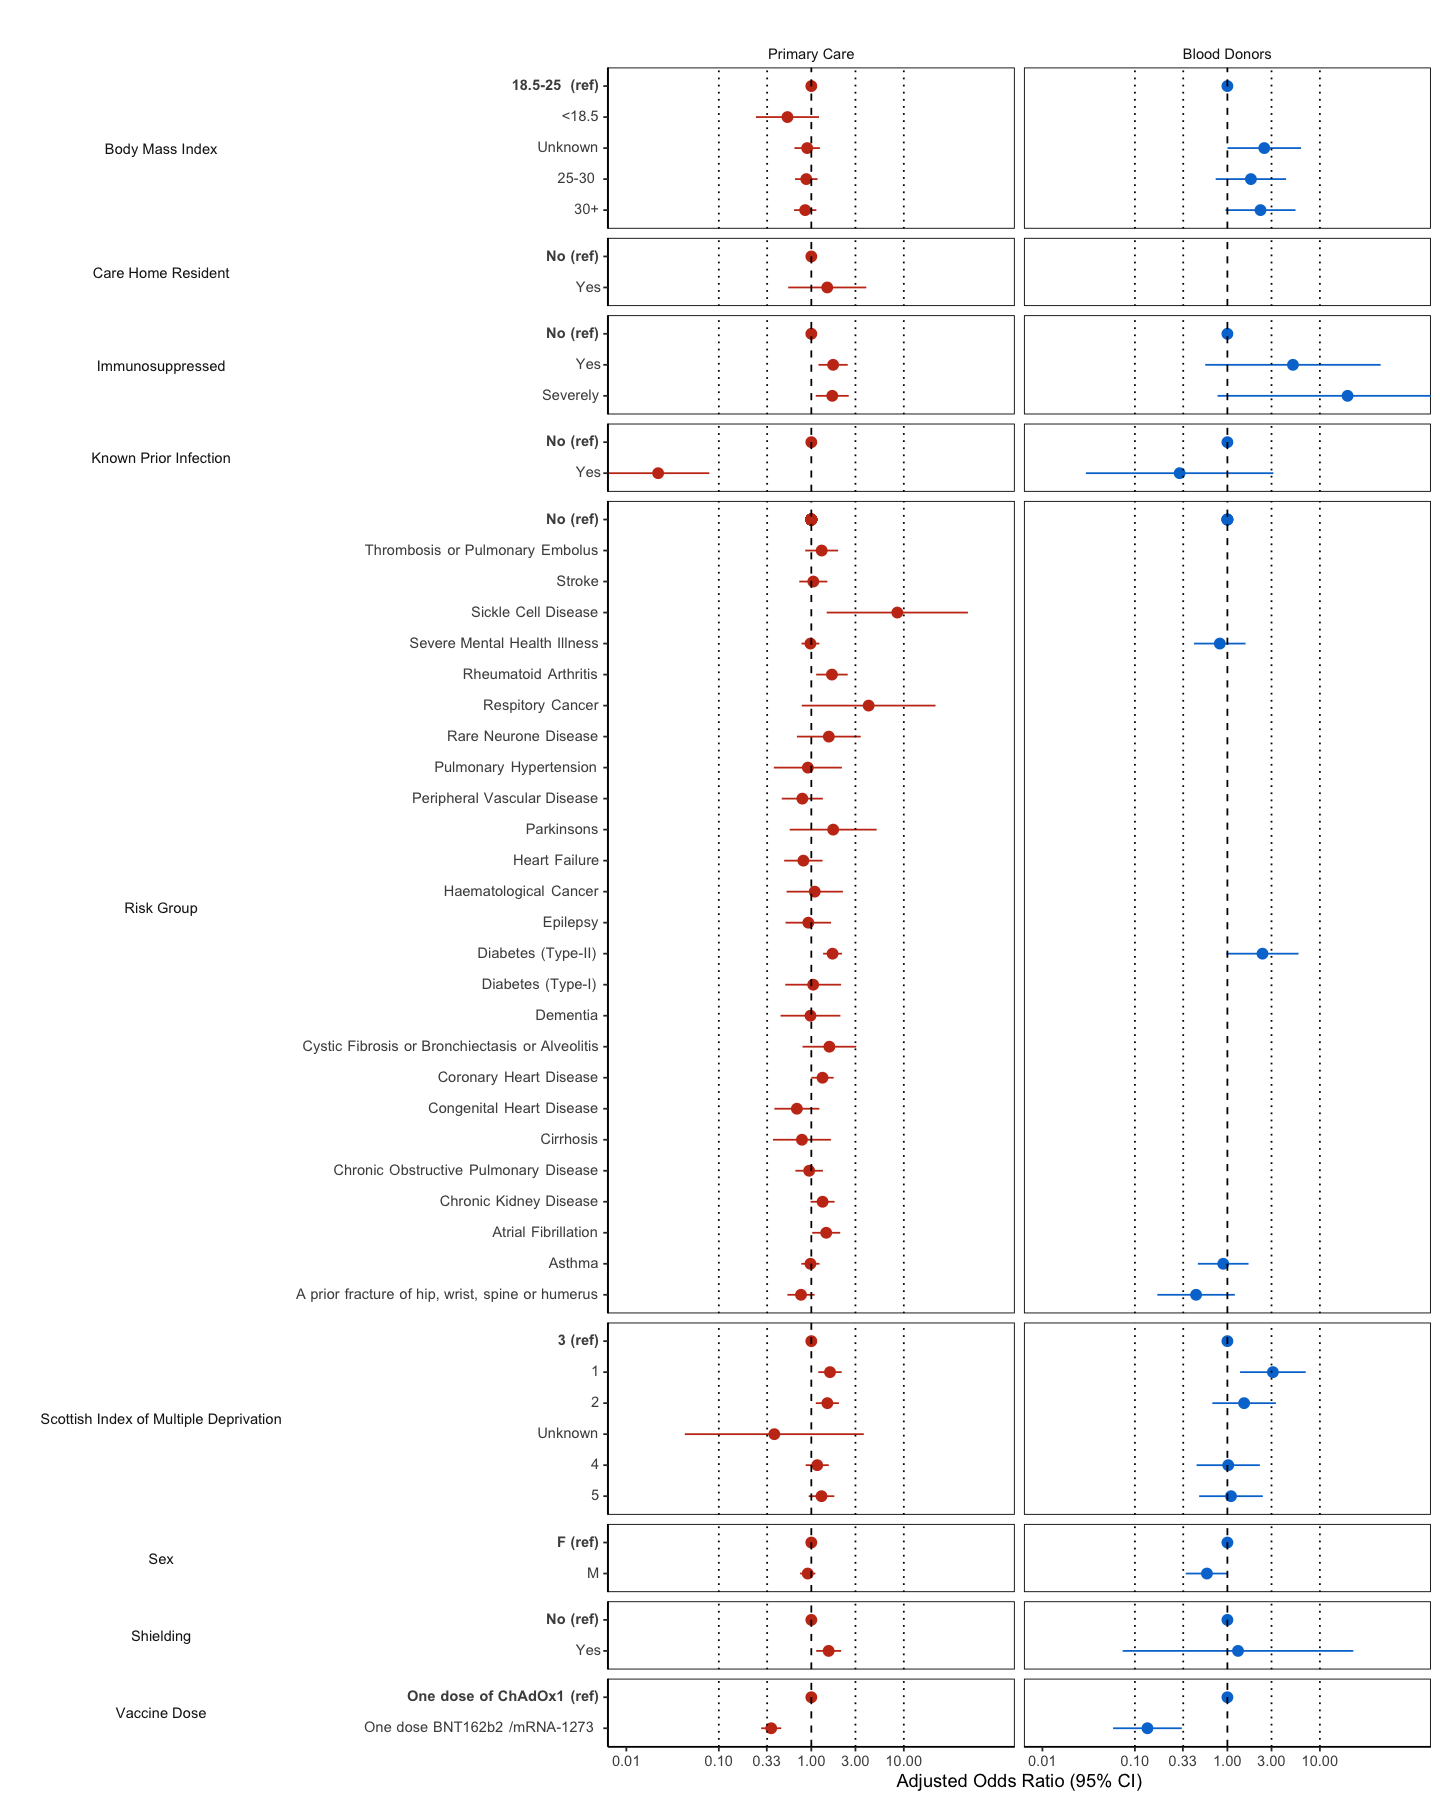

In [37]:
modelB.ORs.R <- readRDS("results/1DOSE/modelB_gamFit_OR.rds") %>%
              mutate(
                    label = gsub("Blood","Haematological",label),
                    level = gsub("AZ","ChAdOx1",level),
                    level = gsub("Pfizer","BNT162b2 ",level),
                    level = gsub("Moderna","mRNA-1273",level)) %>% 
              mutate(
                    level = case_when(var=='cat' & pos==1 ~ "<b>One dose of ChAdOx1 (ref)</b>",
                                      TRUE ~ level))


modelB.ORs.R <- modelB.ORs.R %>% mutate(level=ifelse(grepl("Q_DIAG",names) & level=='Yes',label,level),
                      label=ifelse(grepl("Q_DIAG",names),'Risk Group',label))
#modelB.ORs.R[modelB.ORs.R$label=='Risk Group' & modelB.ORs.R$pos==2,]  <- modelB.ORs.R[modelB.ORs.L$label=='Risk Group' & modelB.ORs.R$pos==2,] %>% mutate(pos=row_number()+1)


options(repr.plot.width=12, repr.plot.height=15)
p <- eavehelpers::plot_ratios(modelB.ORs.R,
                              #no_guides=F,
                              #do_vlines=F,
                              fill=cohort,
                              facet=as.factor(label) ~ fct_rev(as.factor(cohort)),
                              xtitle='Adjusted Odds Ratio (95% CI)',
                              ) 
p
ggsave("modelB_ORs_onedose.pdf", p , width=12, height=15, dpi=300, units="in")

In [14]:
eavehelpers::display_ratios_table(modelB.ORs.R) %>%
  as.character() %>%
  display_html()

var,label,level,uORs,ORs
cat,Vaccine Dose,<b>One dose of ChAdOx1 (ref)</b>,-,-
cat,,One dose BNT162b2 /mRNA-1273,0.34 (0.28 - 0.40),0.37 (0.29 - 0.47)
ch_resident,Care Home Resident,<b>No (ref)</b>,-,-
ch_resident,,Yes,1.57 (0.69 - 3.55),1.49 (0.56 - 3.93)
immuno,Immunosuppressed,<b>No (ref)</b>,-,-
immuno,,Yes,2.30 (1.72 - 3.06),1.72 (1.20 - 2.48)
immuno,,Severely,2.45 (1.79 - 3.34),1.68 (1.12 - 2.54)
prior_infection,Known Prior Infection,<b>No (ref)</b>,-,-
prior_infection,,Yes,0.03 (0.01 - 0.11),0.02 (0.01 - 0.08)
Q_BMI,Body Mass Index,<b>18.5-25 (ref)</b>,-,-


Warning message in geom_pointrange(aes(y = Nominal, ymin = LCL, ymax = UCL, fill = !!sym(fill_var), :
“Ignoring unknown parameters: `width`”


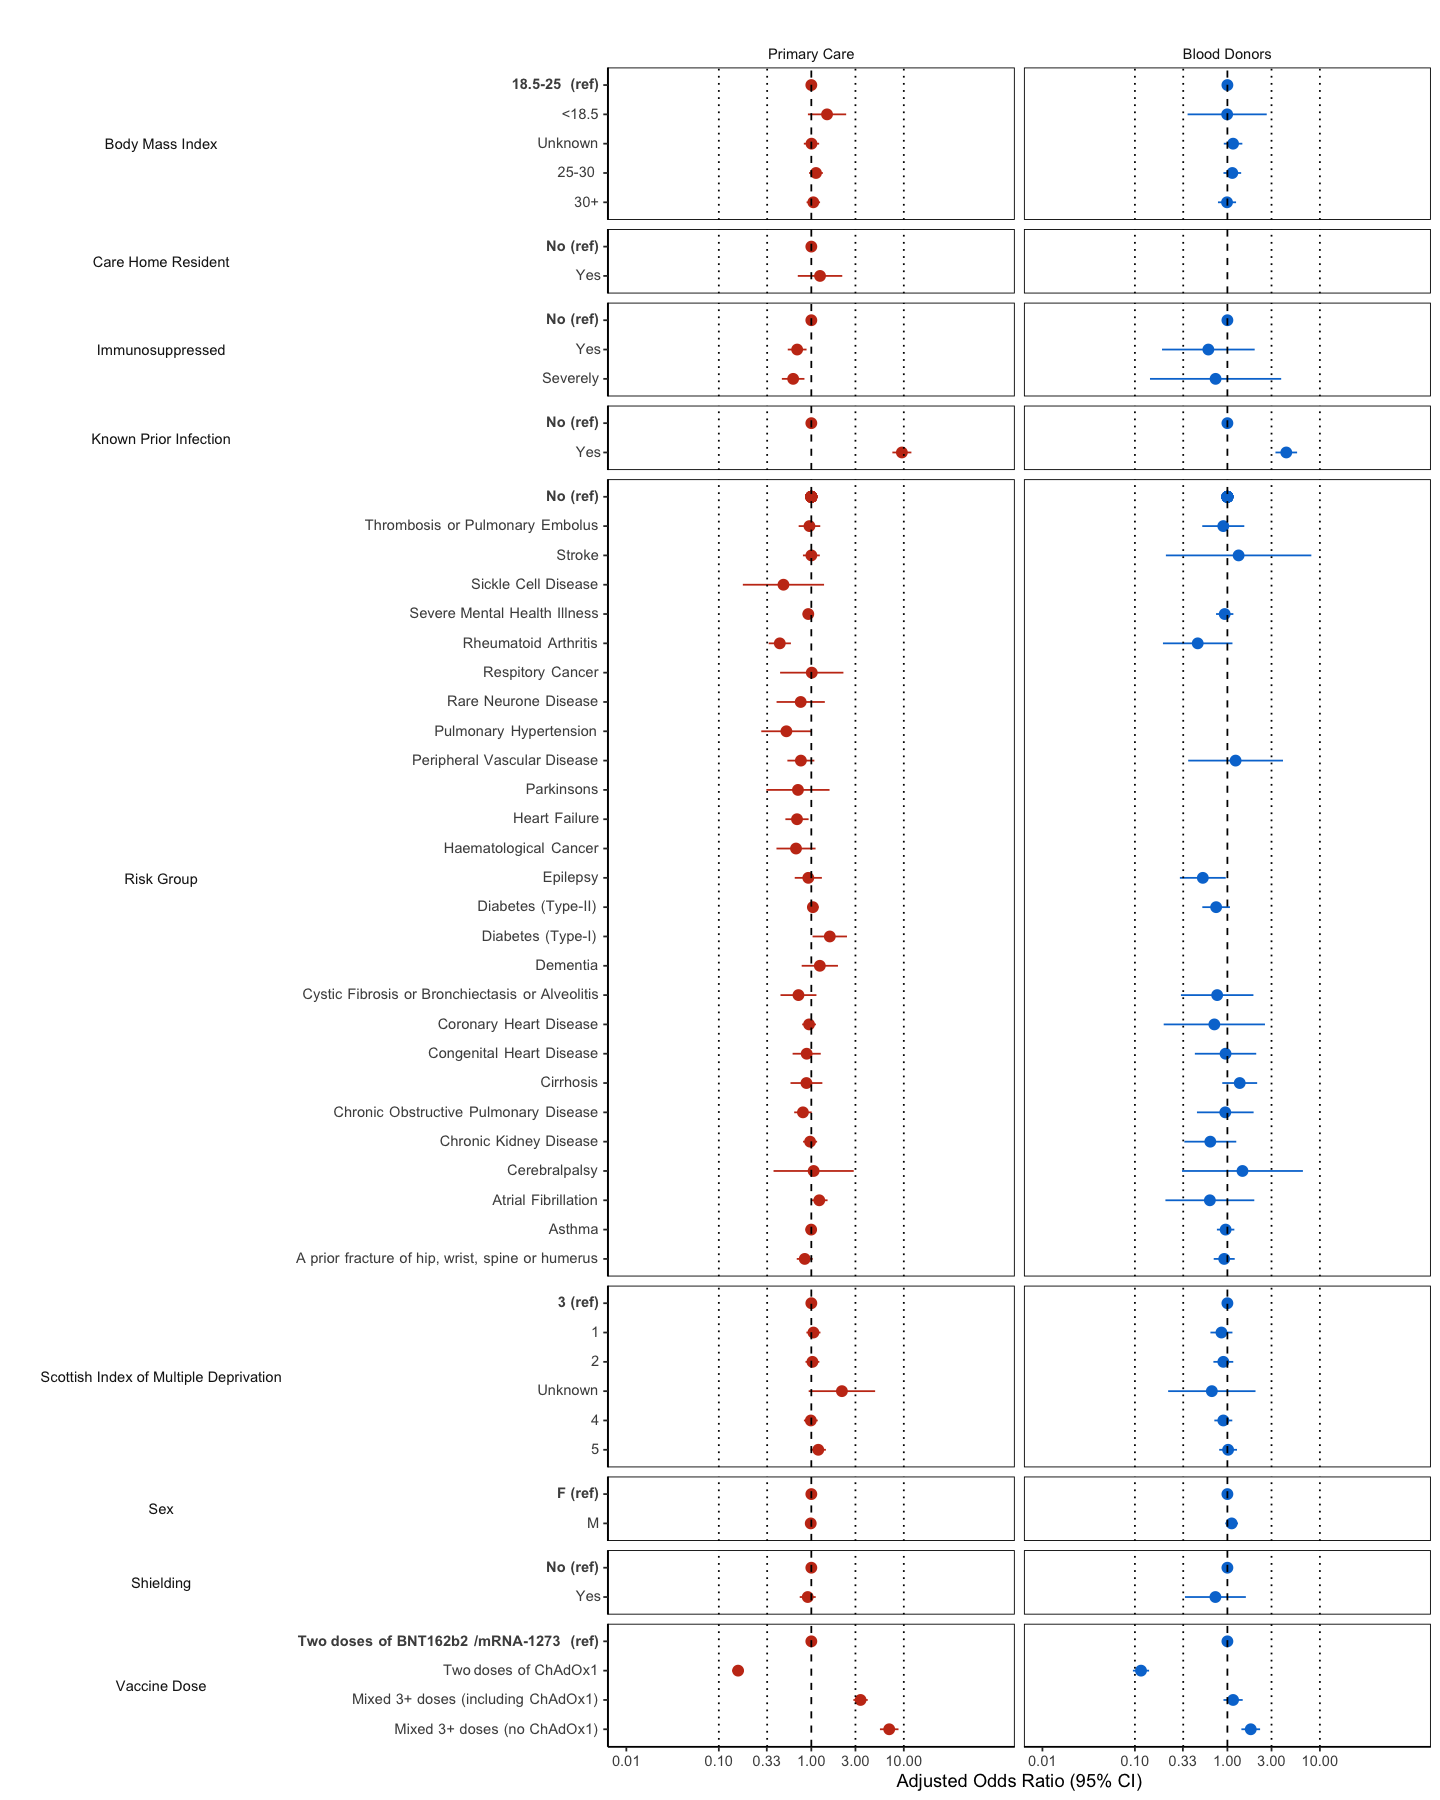

In [15]:
modelB.ORs.R <- readRDS("results/2DOSE_SUFF/modelB_gamFit_OR.rds") %>%
              mutate(
                    label = gsub("Blood","Haematological",label),
                    level = gsub("AZ","ChAdOx1",level),
                    level = gsub("Pfizer","BNT162b2 ",level),
                    level = gsub("Moderna","mRNA-1273",level))


modelB.ORs.R <- modelB.ORs.R %>% mutate(level=ifelse(grepl("Q_DIAG",names) & level=='Yes',label,level),
                      label=ifelse(grepl("Q_DIAG",names),'Risk Group',label))
#modelB.ORs.R[modelB.ORs.R$label=='Risk Group' & modelB.ORs.R$pos==2,]  <- modelB.ORs.R[modelB.ORs.L$label=='Risk Group' & modelB.ORs.R$pos==2,] %>% mutate(pos=row_number()+1)


options(repr.plot.width=12, repr.plot.height=15)
p <- eavehelpers::plot_ratios(modelB.ORs.R,
                              #no_guides=F,
                              #do_vlines=F,
                              fill=cohort,
                              facet=as.factor(label) ~ fct_rev(as.factor(cohort)),
                              xtitle='Adjusted Odds Ratio (95% CI)',
                              ) 
p

In [11]:
write.csv(eavehelpers::get_ratios_table(modelB.ORs %>% 
                                         mutate(
                                               level=ifelse(grepl("Q_DIAG",names) & level=='Yes',label,level),
                                               label=ifelse(grepl("Q_DIAG",names),'Risk Group',label)
                                             ) %>% 
                                        filter(cohort=='Primary Care')),'test.csv')

Warning message in geom_pointrange(aes(y = Nominal, ymin = LCL, ymax = UCL, fill = !!sym(fill_var), :
“Ignoring unknown parameters: `width`”


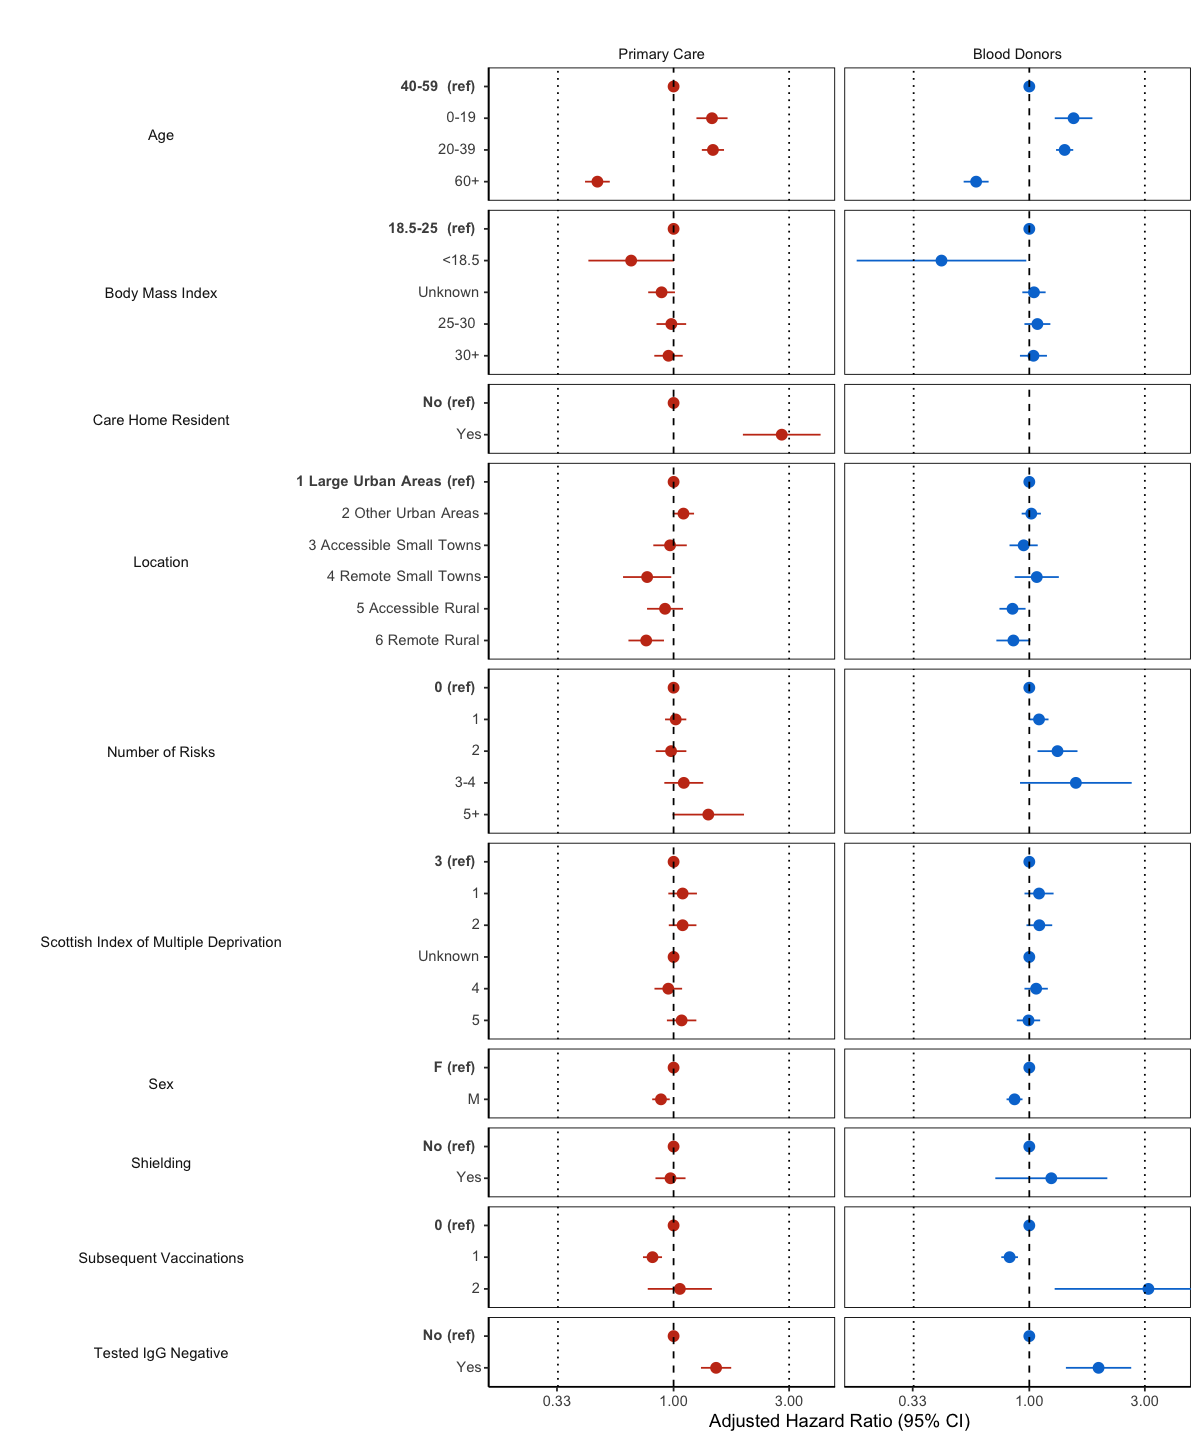

In [38]:
modelC.pc.HRs <- readRDS("results/2DOSE/modelC_pc_cox_HR.rds")
modelC.pc.HRs <- modelC.pc.HRs %>% mutate(level = case_when(
                                    var=='n_risk_gps' & level=='3' ~ '3-4',
                                    var=='n_risk_gps' & level=='4' ~ '5+',
                                    TRUE ~ level),
                                   name = case_when(
                                       name == 'Insufficient Antibodies' ~ 'Tested IgG Negative',
                                       TRUE ~ name
                                   ))

modelC.bd.HRs <- readRDS("results/2DOSE/modelC_bd_cox_HR.rds")
modelC.bd.HRs <- modelC.bd.HRs %>% mutate(level = case_when(
                                        var=='n_risk_gps' & level=='3' ~ '3-4',
                                        var=='n_risk_gps' & level=='4' ~ '5+',
                                        TRUE ~ level),
                                    name = case_when(
                                       name == 'Insufficient Antibodies' ~ 'Tested IgG Negative',
                                       TRUE ~ name
                                   ))

modelC.HRs <- modelC.pc.HRs %>% mutate(cohort='Primary Care') %>% 
              rbind(modelC.bd.HRs %>% mutate(cohort='Blood Donors')) %>%
              mutate(label=name,Nominal=estimate,LCL=conf.low,UCL=conf.high) %>% 
              mutate(label = gsub("Blood","Haematological",label))

options(repr.plot.width=10, repr.plot.height=12)
p.modelC.HRs <- eavehelpers::plot_ratios(modelC.HRs,
                                         xmin=0.2,xmax=4,
                                         fill=cohort,
                                         xtitle='Adjusted Hazard Ratio (95% CI)',
                                         facet=as.factor(label) ~ fct_rev(as.factor(cohort))
                                          ) 
ggsave("modelC_HRs.pdf", p.modelC.HRs , width=12, height=15, dpi=300, units="in")
p.modelC.HRs

In [39]:
modelD.pc.HRs <- readRDS("results/2DOSE/modelD_cox_HR.rds") 

modelE.pc.HRs <- readRDS("results/2DOSE/modelE_cox_HR.rds")%>%
                 mutate(name=ifelse(name=='igg','IgG Titre',name)) 


modelDE.HRs <- modelD.pc.HRs %>% mutate(model='Model D') %>% 
              rbind(modelE.pc.HRs %>% mutate(model='Model E')) %>%
              mutate(label=name,Nominal=estimate,LCL=conf.low,UCL=conf.high) %>% 
              mutate(label=case_when(
                label=='Insufficient Antibodies' ~ 'Tested IgG Negative',
                TRUE ~ label)) %>% 
              mutate(label = factor(label,levels=c('Tested IgG Negative','IgG Titre','Number of Risks','Blood Cancer','Chronic Kidney Disease','Coronary Heart Disease ','Pulmonary Hypertension','Other Risks','Subsequent Vaccinations','Age','Sex','Body Mass Index'))) %>%
              mutate(label = gsub("Blood","Haematological",label))


In [40]:
modelDE.HRs

var,level,estimate,conf.low,conf.high,pos,name,model,label,Nominal,LCL,UCL
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
insufficient_response,<b>No (ref) </b>,1.0000000,1.00000000,1.0000000,1,Insufficient Antibodies,Model D,Tested IgG Negative,1.0000000,1.00000000,1.0000000
insufficient_response,Yes,3.6766329,2.27714220,5.9362256,2,Insufficient Antibodies,Model D,Tested IgG Negative,3.6766329,2.27714220,5.9362256
additional,<b>0 (ref) </b>,1.0000000,1.00000000,1.0000000,1,Subsequent Vaccinations,Model D,Subsequent Vaccinations,1.0000000,1.00000000,1.0000000
additional,1,0.4093424,0.24612219,0.6808048,2,Subsequent Vaccinations,Model D,Subsequent Vaccinations,0.4093424,0.24612219,0.6808048
additional,2,0.4584468,0.14594101,1.4401259,3,Subsequent Vaccinations,Model D,Subsequent Vaccinations,0.4584468,0.14594101,1.4401259
n_risk_gps,<b>0 (ref) </b>,1.0000000,1.00000000,1.0000000,1,Number of Risks,Model D,Number of Risks,1.0000000,1.00000000,1.0000000
n_risk_gps,1,1.6641850,0.81855823,3.3834022,2,Number of Risks,Model D,Number of Risks,1.6641850,0.81855823,3.3834022
n_risk_gps,2,3.1367315,1.53170114,6.4236319,3,Number of Risks,Model D,Number of Risks,3.1367315,1.53170114,6.4236319
n_risk_gps,3-4,5.2441325,2.64140707,10.4114680,4,Number of Risks,Model D,Number of Risks,5.2441325,2.64140707,10.4114680


Warning message in geom_pointrange(aes(y = Nominal, ymin = LCL, ymax = UCL, fill = !!sym(fill_var), :
“Ignoring unknown parameters: `width`”


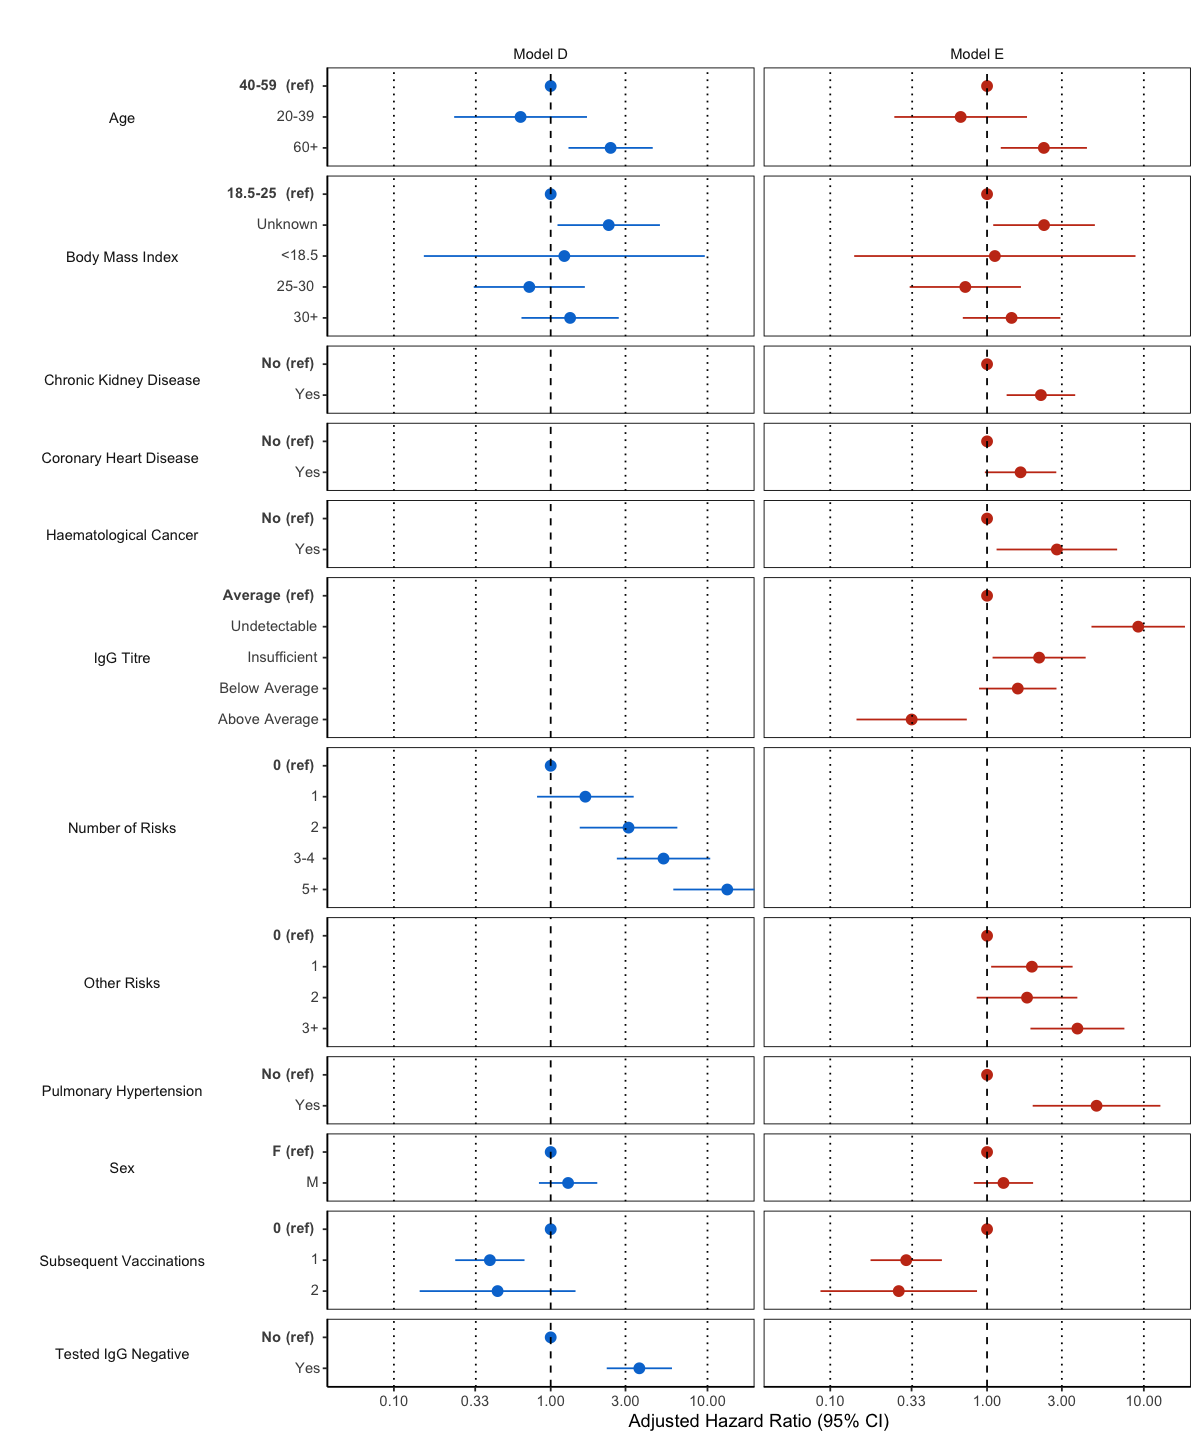

In [41]:
options(repr.plot.width=10, repr.plot.height=12)
p.modelDE.HRs <- eavehelpers::plot_ratios(modelDE.HRs,
                                         xmin=0.05,xmax=15,
                                         fill=model,
                                         xtitle='Adjusted Hazard Ratio (95% CI)',
                                         facet=as.factor(label) ~ as.factor(model)
                                          ) 
ggsave("modelDE_HRs.pdf", p.modelDE.HRs , width=12, height=15, dpi=300, units="in")
p.modelDE.HRs